In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


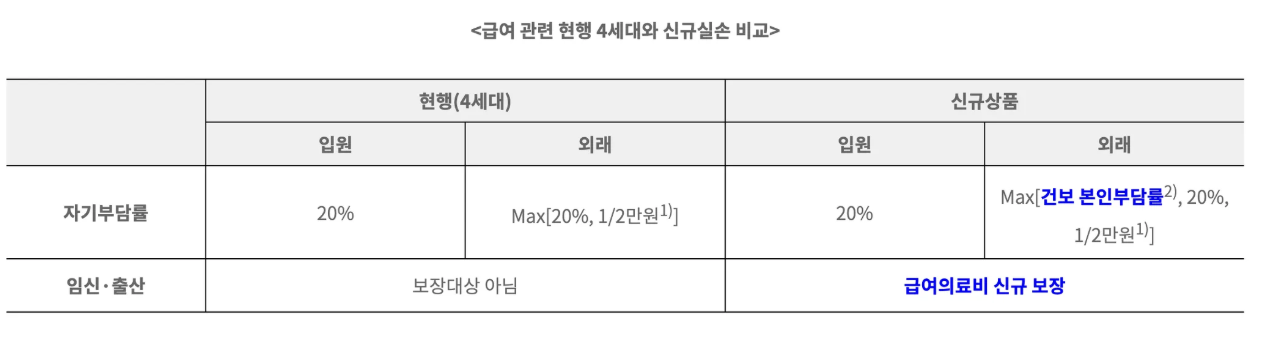

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from itertools import product
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm, matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
#그래프에서 한글 깨져서 폰트 다운
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/content/drive/MyDrive/Colab Notebooks/data/MALGUN.TTF'


font_name = fm.FontProperties(fname=font_path).get_name()

fm.fontManager.addfont(font_path)

plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/data/시계열질병통계.csv'
df = pd.read_csv(path)
df['진료형태'].unique()

array(['계\u3000\u3000S.T', '외래\u3000O.P', '입원\u3000I.P'], dtype=object)

In [ ]:
df_op = df[df['진료형태'] == '외래\u3000O.P'].copy()
df_op.head()

,연도,연령,질병분류,진료형태,진료실인원수,입내원일수,요양급여일수,진료비,급여비,본인부담금,본인부담률,질병분류_22
1,2008,0세,1,외래 O.P,4.0,6.0,6.0,238.82,188.126,50.694,0.212269,1
4,2008,0세,2,외래 O.P,4.0,5.0,5.0,81.78,57.589,24.191,0.295806,1
7,2008,0세,3,외래 O.P,65.0,118.0,118.0,2350.16,1838.309,511.851,0.217794,1
10,2008,0세,4,외래 O.P,26.0,88.0,88.0,1771.33,1295.465,475.865,0.268648,1
13,2008,0세,5,외래 O.P,92222.0,234159.0,245597.0,4616632.34,3331292.463,1285339.877,0.278415,1


In [ ]:
df_op_filtered = df_op[~df_op['질병분류_22'].isin([15])].copy()

In [ ]:
df_ip = df[df['진료형태'] == '입원\u3000I.P'].copy()
df_ip.head()

,연도,연령,질병분류,진료형태,진료실인원수,입내원일수,요양급여일수,진료비,급여비,본인부담금,본인부담률,질병분류_22
2,2008,0세,1,입원 I.P,0.0,0.0,0.0,0.00,0.00,0.00,0.000000,1
5,2008,0세,2,입원 I.P,0.0,0.0,0.0,0.00,0.00,0.00,0.000000,1
8,2008,0세,3,입원 I.P,1.0,3.0,6.0,241.06,216.96,24.10,0.099975,1
11,2008,0세,4,입원 I.P,8.0,36.0,36.0,2144.85,1916.83,228.02,0.106310,1
14,2008,0세,5,입원 I.P,6778.0,37947.0,65881.0,3529643.55,3182367.54,347276.01,0.098388,1


In [ ]:
df_ip_filtered = df_ip[~df_ip['질병분류_22'].isin([15])].copy()

In [ ]:
ts_yearly_임출포함외래본인부담금 = df_op.groupby('연도')['본인부담금'].sum()

In [ ]:
import numpy as np
# ARIMA 모델 차수 결정 (AIC 기준)

# p, d, q의 가능한 범위 정의
# ACF와 PACF 플롯을 기반으로 p와 q의 가능한 범위 설정

p_values = range(0, 3)
d_values = [1] # 데이터에 추세가 있으므로 차분(d) 값 1 설정
q_values = range(0, 3)

aic_values = {}

for p, d, q in product(p_values, d_values, q_values):
    order = (p, d, q)
    try:
        # ARIMA 모델 적합
        model = ARIMA(ts_yearly_임출포함외래본인부담금, order=order)
        model_fit = model.fit()
        aic_values[order] = model_fit.aic
        print(f'ARIMA{order} AIC={model_fit.aic:.2f}')
    except Exception as e:
        print(f'ARIMA{order} failed: {e}')
        aic_values[order] = np.inf # 실패한 모델에 대해 무한대 할당

# AIC가 가장 작은 차수 찾기
best_order = min(aic_values, key=aic_values.get)
print(f'\n원본 데이터에 대한 AIC 기반 최적 ARIMA 차수: {best_order}')

# 원본 시계열 데이터에 최적 ARIMA 모델 적합
arima_model = ARIMA(ts_yearly_임출포함외래본인부담금, order=best_order)
arima_model_fit = arima_model.fit()

display(arima_model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot

ARIMA(0, 1, 0) AIC=674.50
ARIMA(0, 1, 1) AIC=676.43
ARIMA(0, 1, 2) AIC=676.50
ARIMA(1, 1, 0) AIC=675.46
ARIMA(1, 1, 1) AIC=673.98


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of

ARIMA(1, 1, 2) AIC=672.94
ARIMA(2, 1, 0) AIC=675.48
ARIMA(2, 1, 1) AIC=673.96
ARIMA(2, 1, 2) AIC=676.29

원본 데이터에 대한 AIC 기반 최적 ARIMA 차수: (1, 1, 2)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  본인부담금   No. Observations:                   16
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -332.468
Date:                Mon, 04 Aug 2025   AIC                            672.937
Time:                        04:40:02   BIC                            675.769
Sample:                             0   HQIC                           672.907
                                 - 16                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.009    115.845      0.000       0.983       1.017
ma.L1         -1.0765      0.389     -2.766      0.006      -1.839      -0.314
ma.L2          0.0787      0.271      0.291      0.771      -0.452       0.609
sigma2       9.81e+17   1.15e-19   8.51e+36      0.000    9.81e+17    9.81e+17
===================================================================================
Ljung-Box (L1) (Q):                   0.92   Jarque-Bera (JB):                 0.07
Prob(Q):                              0.34   Prob(JB):                         0.97
Heteroskedasticity (H):               2.28   Skew:                             0.10
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.14e+52. Standard errors may be unstable.
"""

In [ ]:
# 향후 5년 (2024-2028) 급여비 예측
ts_yearly_임출포함외래본인부담금.index = pd.PeriodIndex(ts_yearly_임출포함외래본인부담금.index, freq="Y")

forecast_steps = 5
forecast_object_임출포함외래본인부담금 = arima_model_fit.get_forecast(steps=forecast_steps)
forecast_df_임출포함외래본인부담금= forecast_object_임출포함외래본인부담금.conf_int(alpha=0.05) # 95% 신뢰 구간
forecast_df_임출포함외래본인부담금['평균'] = forecast_object_임출포함외래본인부담금.predicted_mean # 평균 예측값 가져오기

forecast_df_임출포함외래본인부담금.columns = ['평균_ci_하한', '평균_ci_상한', '평균']

# 예측 결과 표시
print("향후 5년 예측:")
display(forecast_df_임출포함외래본인부담금)

향후 5년 예측:


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,평균_ci_하한,평균_ci_상한,평균
16,1.831899e+10,2.228441e+10,2.030170e+10
17,1.840729e+10,2.391459e+10,2.116094e+10
18,1.862528e+10,2.541505e+10,2.202017e+10
19,1.890959e+10,2.684916e+10,2.287938e+10
20,1.923475e+10,2.824239e+10,2.373857e+10


In [ ]:
ts_yearly_임출미포함외래본인부담금 = df_op_filtered.groupby('연도')['본인부담금'].sum()

In [ ]:
import numpy as np
# ARIMA 모델 차수 결정 (AIC 기준)

# p, d, q의 가능한 범위 정의
# ACF와 PACF 플롯을 기반으로 p와 q의 가능한 범위 설정

p_values = range(0, 3)
d_values = [1] # 데이터에 추세가 있으므로 차분(d) 값 1 설정
q_values = range(0, 3)

aic_values = {}

for p, d, q in product(p_values, d_values, q_values):
    order = (p, d, q)
    try:
        # ARIMA 모델 적합
        model = ARIMA(ts_yearly_임출미포함외래본인부담금, order=order)
        model_fit = model.fit()
        aic_values[order] = model_fit.aic
        print(f'ARIMA{order} AIC={model_fit.aic:.2f}')
    except Exception as e:
        print(f'ARIMA{order} failed: {e}')
        aic_values[order] = np.inf # 실패한 모델에 대해 무한대 할당

# AIC가 가장 작은 차수 찾기
best_order = min(aic_values, key=aic_values.get)
print(f'\n원본 데이터에 대한 AIC 기반 최적 ARIMA 차수: {best_order}')

# 원본 시계열 데이터에 최적 ARIMA 모델 적합
arima_model = ARIMA(ts_yearly_임출미포함외래본인부담금, order=best_order)
arima_model_fit = arima_model.fit()

display(arima_model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot

ARIMA(0, 1, 0) AIC=674.47
ARIMA(0, 1, 1) AIC=676.39
ARIMA(0, 1, 2) AIC=676.47
ARIMA(1, 1, 0) AIC=675.42
ARIMA(1, 1, 1) AIC=673.94


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of

ARIMA(1, 1, 2) AIC=672.90
ARIMA(2, 1, 0) AIC=675.45
ARIMA(2, 1, 1) AIC=673.93
ARIMA(2, 1, 2) AIC=676.29

원본 데이터에 대한 AIC 기반 최적 ARIMA 차수: (1, 1, 2)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  본인부담금   No. Observations:                   16
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -332.452
Date:                Mon, 04 Aug 2025   AIC                            672.904
Time:                        04:40:42   BIC                            675.736
Sample:                             0   HQIC                           672.874
                                 - 16                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.009    114.460      0.000       0.983       1.017
ma.L1         -1.0763      0.389     -2.764      0.006      -1.839      -0.313
ma.L2          0.0785      0.271      0.290      0.772      -0.453       0.610
sigma2      9.781e+17   1.16e-19   8.44e+36      0.000    9.78e+17    9.78e+17
===================================================================================
Ljung-Box (L1) (Q):                   0.92   Jarque-Bera (JB):                 0.07
Prob(Q):                              0.34   Prob(JB):                         0.97
Heteroskedasticity (H):               2.29   Skew:                             0.10
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.98e+52. Standard errors may be unstable.
"""

In [ ]:

ts_yearly_임출미포함외래본인부담금.index = pd.PeriodIndex(ts_yearly_임출미포함외래본인부담금.index, freq="Y")

forecast_steps = 5
forecast_object_임출미포함외래본인부담금 = arima_model_fit.get_forecast(steps=forecast_steps)
forecast_df_임출미포함외래본인부담금= forecast_object_임출미포함외래본인부담금.conf_int(alpha=0.05) # 95% 신뢰 구간
forecast_df_임출미포함외래본인부담금['평균'] = forecast_object_임출미포함외래본인부담금.predicted_mean # 평균 예측값 가져오기

forecast_df_임출미포함외래본인부담금.columns = ['평균_ci_하한', '평균_ci_상한', '평균']

# 예측 결과 표시
print("향후 5년 예측:")
display(forecast_df_임출미포함외래본인부담금)

향후 5년 예측:


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,평균_ci_하한,평균_ci_상한,평균
16,1.829794e+10,2.225736e+10,2.027765e+10
17,1.838626e+10,2.388573e+10,2.113600e+10
18,1.860415e+10,2.538450e+10,2.199433e+10
19,1.888829e+10,2.681699e+10,2.285264e+10
20,1.921323e+10,2.820864e+10,2.371094e+10


In [ ]:
ts_yearly_임출포함입원본인부담금 = df_ip.groupby('연도')['본인부담금'].sum()

In [ ]:
import numpy as np
# ARIMA 모델 차수 결정 (AIC 기준)

# p, d, q의 가능한 범위 정의
# ACF와 PACF 플롯을 기반으로 p와 q의 가능한 범위 설정

p_values = range(0, 3)
d_values = [1] # 데이터에 추세가 있으므로 차분(d) 값 1 설정
q_values = range(0, 3)

aic_values = {}

for p, d, q in product(p_values, d_values, q_values):
    order = (p, d, q)
    try:
        # ARIMA 모델 적합
        model = ARIMA(ts_yearly_임출포함입원본인부담금, order=order)
        model_fit = model.fit()
        aic_values[order] = model_fit.aic
        print(f'ARIMA{order} AIC={model_fit.aic:.2f}')
    except Exception as e:
        print(f'ARIMA{order} failed: {e}')
        aic_values[order] = np.inf # 실패한 모델에 대해 무한대 할당

# AIC가 가장 작은 차수 찾기
best_order = min(aic_values, key=aic_values.get)
print(f'\n원본 데이터에 대한 AIC 기반 최적 ARIMA 차수: {best_order}')

# 원본 시계열 데이터에 최적 ARIMA 모델 적합
arima_model = ARIMA(ts_yearly_임출포함입원본인부담금, order=best_order)
arima_model_fit = arima_model.fit()

display(arima_model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot

ARIMA(0, 1, 0) AIC=642.96
ARIMA(0, 1, 1) AIC=644.64
ARIMA(0, 1, 2) AIC=645.32
ARIMA(1, 1, 0) AIC=643.57
ARIMA(1, 1, 1) AIC=639.85
ARIMA(1, 1, 2) AIC=639.22
ARIMA(2, 1, 0) AIC=643.73
ARIMA(2, 1, 1) AIC=640.70


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

ARIMA(2, 1, 2) AIC=640.57

원본 데이터에 대한 AIC 기반 최적 ARIMA 차수: (1, 1, 2)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  본인부담금   No. Observations:                   16
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -315.610
Date:                Mon, 04 Aug 2025   AIC                            639.219
Time:                        04:41:07   BIC                            642.052
Sample:                             0   HQIC                           639.189
                                 - 16                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9991      0.077     12.988      0.000       0.848       1.150
ma.L1         -1.1223      0.570     -1.970      0.049      -2.239      -0.005
ma.L2          0.1398      0.320      0.437      0.662      -0.487       0.766
sigma2      1.285e+17   1.56e-18   8.22e+34      0.000    1.29e+17    1.29e+17
===================================================================================
Ljung-Box (L1) (Q):                   1.26   Jarque-Bera (JB):                 0.65
Prob(Q):                              0.26   Prob(JB):                         0.72
Heteroskedasticity (H):               4.38   Skew:                             0.51
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.12e+51. Standard errors may be unstable.
"""

In [ ]:
ts_yearly_임출포함입원본인부담금.index = pd.PeriodIndex(ts_yearly_임출포함입원본인부담금.index, freq="Y")

forecast_steps = 5
forecast_object_임출포함입원본인부담금 = arima_model_fit.get_forecast(steps=forecast_steps)
forecast_df_임출포함입원본인부담금= forecast_object_임출포함입원본인부담금.conf_int(alpha=0.05) # 95% 신뢰 구간
forecast_df_임출포함입원본인부담금['평균'] = forecast_object_임출포함입원본인부담금.predicted_mean # 평균 예측값 가져오기

forecast_df_임출포함입원본인부담금.columns = ['평균_ci_하한', '평균_ci_상한', '평균']

# 예측 결과 표시
print("향후 5년 예측:")
display(forecast_df_임출포함입원본인부담금)

향후 5년 예측:


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,평균_ci_하한,평균_ci_상한,평균
16,6.649576e+09,8.077053e+09,7.363314e+09
17,6.732375e+09,8.658344e+09,7.695360e+09
18,6.851199e+09,9.203017e+09,8.027108e+09
19,6.988927e+09,9.728190e+09,8.358558e+09
20,7.138287e+09,1.024114e+10,8.689712e+09


In [ ]:
ts_yearly_임출미포함입원본인부담금 = df_ip_filtered.groupby('연도')['본인부담금'].sum()

In [ ]:
import numpy as np
# ARIMA 모델 차수 결정 (AIC 기준)

# p, d, q의 가능한 범위 정의
# ACF와 PACF 플롯을 기반으로 p와 q의 가능한 범위 설정

p_values = range(0, 3)
d_values = [1] # 데이터에 추세가 있으므로 차분(d) 값 1 설정
q_values = range(0, 3)

aic_values = {}

for p, d, q in product(p_values, d_values, q_values):
    order = (p, d, q)
    try:
        # ARIMA 모델 적합
        model = ARIMA(ts_yearly_임출미포함입원본인부담금, order=order)
        model_fit = model.fit()
        aic_values[order] = model_fit.aic
        print(f'ARIMA{order} AIC={model_fit.aic:.2f}')
    except Exception as e:
        print(f'ARIMA{order} failed: {e}')
        aic_values[order] = np.inf # 실패한 모델에 대해 무한대 할당

# AIC가 가장 작은 차수 찾기
best_order = min(aic_values, key=aic_values.get)
print(f'\n원본 데이터에 대한 AIC 기반 최적 ARIMA 차수: {best_order}')

# 원본 시계열 데이터에 최적 ARIMA 모델 적합
arima_model = ARIMA(ts_yearly_임출미포함입원본인부담금, order=best_order)
arima_model_fit = arima_model.fit()

display(arima_model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot

ARIMA(0, 1, 0) AIC=642.87
ARIMA(0, 1, 1) AIC=644.53
ARIMA(0, 1, 2) AIC=645.22
ARIMA(1, 1, 0) AIC=643.42
ARIMA(1, 1, 1) AIC=639.79
ARIMA(1, 1, 2) AIC=639.28
ARIMA(2, 1, 0) AIC=643.65
ARIMA(2, 1, 1) AIC=640.80


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

ARIMA(2, 1, 2) AIC=640.68

원본 데이터에 대한 AIC 기반 최적 ARIMA 차수: (1, 1, 2)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  본인부담금   No. Observations:                   16
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -315.638
Date:                Mon, 04 Aug 2025   AIC                            639.275
Time:                        04:41:50   BIC                            642.108
Sample:                             0   HQIC                           639.245
                                 - 16                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9991      0.079     12.590      0.000       0.844       1.155
ma.L1         -1.1180      0.570     -1.960      0.050      -2.236   -6.97e-05
ma.L2          0.1358      0.337      0.403      0.687      -0.525       0.796
sigma2      1.289e+17   1.58e-18   8.17e+34      0.000    1.29e+17    1.29e+17
===================================================================================
Ljung-Box (L1) (Q):                   1.09   Jarque-Bera (JB):                 0.77
Prob(Q):                              0.30   Prob(JB):                         0.68
Heteroskedasticity (H):               4.34   Skew:                             0.55
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.31e+51. Standard errors may be unstable.
"""

In [ ]:
ts_yearly_임출미포함입원본인부담금.index = pd.PeriodIndex(ts_yearly_임출미포함입원본인부담금.index, freq="Y")

forecast_steps = 5
forecast_object_임출미포함입원본인부담금 = arima_model_fit.get_forecast(steps=forecast_steps)
forecast_df_임출미포함입원본인부담금= forecast_object_임출미포함입원본인부담금.conf_int(alpha=0.05) # 95% 신뢰 구간
forecast_df_임출미포함입원본인부담금['평균'] = forecast_object_임출미포함입원본인부담금.predicted_mean # 평균 예측값 가져오기

forecast_df_임출미포함입원본인부담금.columns = ['평균_ci_하한', '평균_ci_상한', '평균']

# 예측 결과 표시
print("향후 5년 예측:")
display(forecast_df_임출미포함입원본인부담금)

향후 5년 예측:


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,평균_ci_하한,평균_ci_상한,평균
16,6.573363e+09,8.002860e+09,7.288112e+09
17,6.651305e+09,8.583938e+09,7.617622e+09
18,6.765841e+09,9.127812e+09,7.946826e+09
19,6.899515e+09,9.651937e+09,8.275726e+09
20,7.044942e+09,1.016370e+10,8.604320e+09


In [ ]:
for i in range(len(forecast_df_임출미포함입원본인부담금)):
    year = 2024 + i
    a = forecast_df_임출미포함입원본인부담금['평균'].iloc[i]
    b = forecast_df_임출포함입원본인부담금['평균'].iloc[i]
    c = forecast_df_임출미포함외래본인부담금['평균'].iloc[i]
    d = forecast_df_임출포함외래본인부담금['평균'].iloc[i]

    e = a * (1-0.2) + c * (1-0.2)
    f = b * (1-0.2) + d * (1-0.285)


    print(f"\n*{year}")
    print(f"4세대 기준 {year}년 급여 본인부담금에 대한 실손보험 보험금 지출 예측: 약 {round(e):,.0f}(원)")
    print(f"5세대 기준 {year}년 급여 본인부담금에 대한 실손보험 보험금 지출 예측: 약 {round(f):,.0f}(원)")
#    print(f"{year}년 급여 본인부담금에 대한 실손보험 4세대와 5세대 간 보험금 차액 예측: 약 {round(g):,.0f}(원)")


*2024
4세대 기준 2024년 급여 본인부담금에 대한 실손보험 보험금 지출 예측: 약 22,052,610,353(원)
5세대 기준 2024년 급여 본인부담금에 대한 실손보험 보험금 지출 예측: 약 20,406,366,940(원)

*2025
4세대 기준 2025년 급여 본인부담금에 대한 실손보험 보험금 지출 예측: 약 23,002,894,805(원)
5세대 기준 2025년 급여 본인부담금에 대한 실손보험 보험금 지출 예측: 약 21,286,360,467(원)

*2026
4세대 기준 2026년 급여 본인부담금에 대한 실손보험 보험금 지출 예측: 약 23,952,922,173(원)
5세대 기준 2026년 급여 본인부담금에 대한 실손보험 보험금 지출 예측: 약 22,166,104,864(원)

*2027
4세대 기준 2027년 급여 본인부담금에 대한 실손보험 보험금 지출 예측: 약 24,902,692,685(원)
5세대 기준 2027년 급여 본인부담금에 대한 실손보험 보험금 지출 예측: 약 23,045,600,346(원)

*2028
4세대 기준 2028년 급여 본인부담금에 대한 실손보험 보험금 지출 예측: 약 25,852,206,567(원)
5세대 기준 2028년 급여 본인부담금에 대한 실손보험 보험금 지출 예측: 약 23,924,847,125(원)


In [ ]:
import numpy as np
# ARIMA 모델 차수 결정 (AIC 기준)

# p, d, q의 가능한 범위 정의
# ACF와 PACF 플롯을 기반으로 p와 q의 가능한 범위 설정

p_values = range(0, 3)
d_values = [1] # 데이터에 추세가 있으므로 차분(d) 값 1 설정
q_values = range(0, 3)

aic_values = {}

for p, d, q in product(p_values, d_values, q_values):
    order = (p, d, q)
    try:
        # ARIMA 모델 적합
        model = ARIMA(ts_yearly_임출외래급여비, order=order)
        model_fit = model.fit()
        aic_values[order] = model_fit.aic
        print(f'ARIMA{order} AIC={model_fit.aic:.2f}')
    except Exception as e:
        print(f'ARIMA{order} failed: {e}')
        aic_values[order] = np.inf # 실패한 모델에 대해 무한대 할당

# AIC가 가장 작은 차수 찾기
best_order = min(aic_values, key=aic_values.get)
print(f'\n원본 데이터에 대한 AIC 기반 최적 ARIMA 차수: {best_order}')

# 원본 시계열 데이터에 최적 ARIMA 모델 적합
arima_model = ARIMA(ts_yearly_임출외래급여비, order=best_order)
arima_model_fit = arima_model.fit()

display(arima_model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot

ARIMA(0, 1, 0) AIC=702.09
ARIMA(0, 1, 1) AIC=704.01
ARIMA(0, 1, 2) AIC=703.65
ARIMA(1, 1, 0) AIC=702.95


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1) AIC=701.11


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA(1, 1, 2) AIC=700.25
ARIMA(2, 1, 0) AIC=701.83


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot

ARIMA(2, 1, 1) AIC=700.18


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

ARIMA(2, 1, 2) AIC=701.20

원본 데이터에 대한 AIC 기반 최적 ARIMA 차수: (2, 1, 1)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    급여비   No. Observations:                   16
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -346.088
Date:                Mon, 04 Aug 2025   AIC                            700.176
Time:                        04:21:17   BIC                            703.008
Sample:                             0   HQIC                           700.146
                                 - 16                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8979      0.515      1.742      0.081      -0.112       1.908
ar.L2          0.1012      0.427      0.237      0.813      -0.735       0.938
ma.L1         -0.9822      0.973     -1.009      0.313      -2.890       0.926
sigma2      7.656e+18   1.18e-19   6.46e+37      0.000    7.66e+18    7.66e+18
===================================================================================
Ljung-Box (L1) (Q):                   0.73   Jarque-Bera (JB):                 0.22
Prob(Q):                              0.39   Prob(JB):                         0.90
Heteroskedasticity (H):               2.18   Skew:                            -0.30
Prob(H) (two-sided):                  0.41   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.32e+54. Standard errors may be unstable.
"""

In [ ]:
# 향후 5년 (2024-2028) 급여비 예측
ts_yearly_임출외래급여비.index = pd.PeriodIndex(ts_yearly_임출외래급여비.index, freq="Y")

forecast_steps = 5
forecast_object_임출외래급여비 = arima_model_fit.get_forecast(steps=forecast_steps)
forecast_df_임출외래급여비= forecast_object_임출외래급여비.conf_int(alpha=0.05) # 95% 신뢰 구간
forecast_df_임출외래급여비['평균'] = forecast_object_임출외래급여비.predicted_mean # 평균 예측값 가져오기

forecast_df_임출외래급여비.columns = ['평균_ci_하한', '평균_ci_상한', '평균']

# 예측 결과 표시
print("향후 5년 예측:")
display(forecast_df_임출외래급여비)

향후 5년 예측:


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,평균_ci_하한,평균_ci_상한,평균
16,4.547975e+10,5.649271e+10,5.098623e+10
17,4.564675e+10,6.079320e+10,5.321998e+10
18,4.609111e+10,6.477753e+10,5.543432e+10
19,4.671572e+10,6.858136e+10,5.764854e+10
20,4.744607e+10,7.227530e+10,5.986069e+10


In [ ]:
print("\n향후 5년 예측 급여비(천 원) 값 (2024-2028):")
print(f"2024년 예상 총 급여비(천 원): {forecast_df_임출외래급여비['평균'].iloc[0]:,.0f}")
print(f"2028년 예상 총 급여비(천 원): {forecast_df_임출외래급여비['평균'].iloc[-1]:,.0f}")


향후 5년 예측 급여비(천 원) 값 (2024-2028):
2024년 예상 총 급여비(천 원): 50,986,232,002
2028년 예상 총 급여비(천 원): 59,860,685,560


In [ ]:
#외래 중 진료비
ts_yearly_임출외래진료비 = df_op.groupby('연도')['진료비'].sum()

In [ ]:
import numpy as np
# ARIMA 모델 차수 결정 (AIC 기준)

# p, d, q의 가능한 범위 정의
# ACF와 PACF 플롯을 기반으로 p와 q의 가능한 범위 설정

p_values = range(0, 3)
d_values = [1] # 데이터에 추세가 있으므로 차분(d) 값 1 설정
q_values = range(0, 3)

aic_values_진료비 = {}

for p, d, q in product(p_values, d_values, q_values):
    order = (p, d, q)
    try:
        # ARIMA 모델 적합
        model = ARIMA(ts_yearly_임출외래진료비, order=order)
        model_fit = model.fit()
        aic_values_진료비[order] = model_fit.aic
        print(f'ARIMA{order} AIC={model_fit.aic:.2f}')
    except Exception as e:
        print(f'ARIMA{order} failed: {e}')
        aic_values_진료비[order] = np.inf # 실패한 모델에 대해 무한대 할당

# AIC가 가장 작은 차수 찾기
best_order_진료비 = min(aic_values_진료비, key=aic_values_진료비.get)
print(f'\n원본 데이터에 대한 AIC 기반 최적 ARIMA 차수: {best_order_진료비}')

# 원본 시계열 데이터에 최적 ARIMA 모델 적합
arima_model_진료비 = ARIMA(ts_yearly_임출외래진료비, order=best_order_진료비)
arima_model_fit_진료비 = arima_model_진료비.fit()

print("\n원본 데이터에 대한 최적 ARIMA 모델 요약:")
display(arima_model_fit_진료비.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot

ARIMA(0, 1, 0) AIC=712.09
ARIMA(0, 1, 1) AIC=714.01
ARIMA(0, 1, 2) AIC=713.77
ARIMA(1, 1, 0) AIC=712.97
ARIMA(1, 1, 1) AIC=711.21
ARIMA(1, 1, 2) AIC=710.20
ARIMA(2, 1, 0) AIC=712.21


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot

ARIMA(2, 1, 1) AIC=710.53


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

ARIMA(2, 1, 2) AIC=712.04

원본 데이터에 대한 AIC 기반 최적 ARIMA 차수: (1, 1, 2)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



원본 데이터에 대한 최적 ARIMA 모델 요약:


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    진료비   No. Observations:                   16
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -351.099
Date:                Mon, 04 Aug 2025   AIC                            710.199
Time:                        04:22:30   BIC                            713.031
Sample:                             0   HQIC                           710.168
                                 - 16                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9995      0.058     17.173      0.000       0.885       1.114
ma.L1         -1.0721      0.532     -2.016      0.044      -2.114      -0.030
ma.L2          0.0838      0.348      0.241      0.810      -0.599       0.766
sigma2      1.405e+19   1.47e-20   9.57e+38      0.000    1.41e+19    1.41e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.90   Jarque-Bera (JB):                 0.09
Prob(Q):                              0.34   Prob(JB):                         0.96
Heteroskedasticity (H):               2.31   Skew:                            -0.18
Prob(H) (two-sided):                  0.38   Kurtosis:                         3.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.58e+55. Standard errors may be unstable.
"""

In [ ]:
# 향후 5년 (2024-2028) 진료비 예측
ts_yearly_임출외래진료비.index = pd.PeriodIndex(ts_yearly_임출외래진료비.index, freq="Y")

forecast_steps = 5
forecast_object_5진료비 = arima_model_fit_진료비.get_forecast(steps=forecast_steps)
forecast_df_5진료비 = forecast_object_5진료비.conf_int(alpha=0.05) # 95% 신뢰 구간
forecast_df_5진료비['평균'] = forecast_object_5진료비.predicted_mean # 평균 예측값 가져오기

forecast_df_5진료비.columns = ['평균_ci_하한', '평균_ci_상한', '평균']

print("향후 5년 예측:")
display(forecast_df_5진료비)

향후 5년 예측:


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,평균_ci_하한,평균_ci_상한,평균
16,6.381205e+10,7.875942e+10,7.128573e+10
17,6.400122e+10,8.471565e+10,7.435844e+10
18,6.466496e+10,9.019448e+10,7.742972e+10
19,6.557089e+10,9.542830e+10,8.049960e+10
20,6.662515e+10,1.005110e+11,8.356806e+10


In [ ]:
print("\n향후 5년 예측 진료비(천 원) 값 (2024-2028):")
print(f"2024년 예상 총 진료비(천 원): {forecast_df_5진료비['평균'].iloc[0]:,.0f}")
print(f"2028년 예상 총 진료비(천 원): {forecast_df_5진료비['평균'].iloc[-1]:,.0f}")


향후 5년 예측 진료비(천 원) 값 (2024-2028):
2024년 예상 총 진료비(천 원): 71,285,734,371
2028년 예상 총 진료비(천 원): 83,568,055,095


# 4세대 급여비 예측(임신, 출산 제외)

In [ ]:
#15. 임신, 출산 및 산후기 (질병분류_22)

df_op_filtered = df_op[~df_op['질병분류_22'].isin([15])].copy()

# 외래 중 급여비 (임신, 출산 등 제외)
ts_yearly_4급여비 = df_op_filtered.groupby('연도')['급여비'].sum()

In [ ]:
df_op_filtered['질병분류_22'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 21])

In [ ]:
ts_yearly_4급여비

,급여비
연도,
2008,1.562337e+10
2009,1.740282e+10
2010,1.893011e+10
2011,1.999486e+10
2012,2.060123e+10
2013,2.015843e+10
2014,2.354289e+10
2015,2.015843e+10
2016,2.735464e+10


In [ ]:
import numpy as np
# ARIMA 모델 차수 결정 (AIC 기준)

# p, d, q의 가능한 범위 정의
# ACF와 PACF 플롯을 기반으로 p와 q의 가능한 범위 설정

p_values = range(0, 3)
d_values = [1] # 데이터에 추세가 있으므로 차분(d) 값 1 설정
q_values = range(0, 3)

aic_values = {}

for p, d, q in product(p_values, d_values, q_values):
    order = (p, d, q)
    try:
        # ARIMA 모델 적합
        model = ARIMA(ts_yearly_4급여비, order=order)
        model_fit = model.fit()
        aic_values[order] = model_fit.aic
        print(f'ARIMA{order} AIC={model_fit.aic:.2f}')
    except Exception as e:
        print(f'ARIMA{order} failed: {e}')
        aic_values[order] = np.inf # 실패한 모델에 대해 무한대 할당

# AIC가 가장 작은 차수 찾기
best_order = min(aic_values, key=aic_values.get)
print(f'\n원본 데이터에 대한 AIC 기반 최적 ARIMA 차수: {best_order}')

# 원본 시계열 데이터에 최적 ARIMA 모델 적합
arima_model = ARIMA(ts_yearly_4급여비, order=best_order)
arima_model_fit = arima_model.fit()

display(arima_model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot

ARIMA(0, 1, 0) AIC=702.05
ARIMA(0, 1, 1) AIC=703.98
ARIMA(0, 1, 2) AIC=703.62
ARIMA(1, 1, 0) AIC=702.93
ARIMA(1, 1, 1) AIC=701.09
ARIMA(1, 1, 2) AIC=700.24
ARIMA(2, 1, 0) AIC=701.80
ARIMA(2, 1, 1) AIC=700.14


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

ARIMA(2, 1, 2) AIC=701.26

원본 데이터에 대한 AIC 기반 최적 ARIMA 차수: (2, 1, 1)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    급여비   No. Observations:                   16
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -346.070
Date:                Mon, 04 Aug 2025   AIC                            700.139
Time:                        01:00:34   BIC                            702.971
Sample:                             0   HQIC                           700.109
                                 - 16                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8974      0.511      1.757      0.079      -0.103       1.898
ar.L2          0.1017      0.423      0.240      0.810      -0.728       0.932
ma.L1         -0.9824      0.967     -1.016      0.310      -2.877       0.913
sigma2      7.618e+18   1.18e-19   6.44e+37      0.000    7.62e+18    7.62e+18
===================================================================================
Ljung-Box (L1) (Q):                   0.73   Jarque-Bera (JB):                 0.22
Prob(Q):                              0.39   Prob(JB):                         0.90
Heteroskedasticity (H):               2.18   Skew:                            -0.30
Prob(H) (two-sided):                  0.41   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.61e+54. Standard errors may be unstable.
"""

In [ ]:
# 향후 5년 (2024-2028) 급여비 예측
ts_yearly_4급여비.index = pd.PeriodIndex(ts_yearly_4급여비.index, freq="Y")

forecast_steps = 5
forecast_4급여비 = arima_model_fit.get_forecast(steps=forecast_steps)
forecast_df_4급여비= forecast_4급여비.conf_int(alpha=0.05) # 95% 신뢰 구간
forecast_df_4급여비['평균'] = forecast_4급여비.predicted_mean # 평균 예측값 가져오기

forecast_df_4급여비.columns = ['평균_ci_하한', '평균_ci_상한', '평균']

# 예측 결과 표시
print("향후 5년 예측:")
display(forecast_df_4급여비)

향후 5년 예측:


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,평균_ci_하한,평균_ci_상한,평균
16,4.542023e+10,5.640679e+10,5.091351e+10
17,4.559192e+10,6.069798e+10,5.314495e+10
18,4.603910e+10,6.467446e+10,5.535678e+10
19,4.666606e+10,6.847104e+10,5.756855e+10
20,4.739843e+10,7.215812e+10,5.977827e+10


In [ ]:
print("\n향후 5년 4세대 예측 급여비(천 원) 값 (2024-2028):")
print(f"2024년 4세대 예상 총 급여비(천 원): {forecast_df_4급여비['평균'].iloc[0]:,.0f}")
print(f"2028년 4세대 예상 총 급여비(천 원): {forecast_df_4급여비['평균'].iloc[-1]:,.0f}")


향후 5년 4세대 예측 급여비(천 원) 값 (2024-2028):
2024년 4세대 예상 총 급여비(천 원): 50,913,510,581
2028년 4세대 예상 총 급여비(천 원): 59,778,274,974


In [ ]:
#외래 중 진료비
ts_yearly_4진료비 = df_op_filtered.groupby('연도')['진료비'].sum()

In [ ]:
import numpy as np
# ARIMA 모델 차수 결정 (AIC 기준)

# p, d, q의 가능한 범위 정의
# ACF와 PACF 플롯을 기반으로 p와 q의 가능한 범위 설정

p_values = range(0, 3)
d_values = [1] # 데이터에 추세가 있으므로 차분(d) 값 1 설정
q_values = range(0, 3)

aic_values_진료비 = {}

for p, d, q in product(p_values, d_values, q_values):
    order = (p, d, q)
    try:
        # ARIMA 모델 적합
        model = ARIMA(ts_yearly_4진료비, order=order)
        model_fit = model.fit()
        aic_values_진료비[order] = model_fit.aic
        print(f'ARIMA{order} AIC={model_fit.aic:.2f}')
    except Exception as e:
        print(f'ARIMA{order} failed: {e}')
        aic_values_진료비[order] = np.inf # 실패한 모델에 대해 무한대 할당

# AIC가 가장 작은 차수 찾기
best_order_진료비 = min(aic_values_진료비, key=aic_values_진료비.get)
print(f'\n원본 데이터에 대한 AIC 기반 최적 ARIMA 차수: {best_order_진료비}')

# 원본 시계열 데이터에 최적 ARIMA 모델 적합
arima_model_진료비 = ARIMA(ts_yearly_4진료비, order=best_order_진료비)
arima_model_fit_진료비 = arima_model_진료비.fit()

print("\n원본 데이터에 대한 최적 ARIMA 모델 요약:")
display(arima_model_fit_진료비.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot

ARIMA(0, 1, 0) AIC=712.06
ARIMA(0, 1, 1) AIC=713.98
ARIMA(0, 1, 2) AIC=713.74
ARIMA(1, 1, 0) AIC=712.95
ARIMA(1, 1, 1) AIC=711.19
ARIMA(1, 1, 2) AIC=710.18
ARIMA(2, 1, 0) AIC=712.17
ARIMA(2, 1, 1) AIC=710.50


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

ARIMA(2, 1, 2) AIC=712.07

원본 데이터에 대한 AIC 기반 최적 ARIMA 차수: (1, 1, 2)

원본 데이터에 대한 최적 ARIMA 모델 요약:


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    진료비   No. Observations:                   16
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -351.088
Date:                Mon, 04 Aug 2025   AIC                            710.176
Time:                        01:00:44   BIC                            713.008
Sample:                             0   HQIC                           710.146
                                 - 16                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9995      0.058     17.109      0.000       0.885       1.114
ma.L1         -1.0722      0.532     -2.014      0.044      -2.116      -0.029
ma.L2          0.0839      0.348      0.241      0.809      -0.598       0.765
sigma2      1.405e+19   1.47e-20   9.56e+38      0.000     1.4e+19     1.4e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 0.09
Prob(Q):                              0.34   Prob(JB):                         0.96
Heteroskedasticity (H):               2.32   Skew:                            -0.18
Prob(H) (two-sided):                  0.38   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.75e+55. Standard errors may be unstable.
"""

In [ ]:
# 향후 5년 (2024-2028) 진료비 예측
ts_yearly_4진료비.index = pd.PeriodIndex(ts_yearly_4진료비.index, freq="Y")

forecast_steps = 5
forecast_object_4진료비 = arima_model_fit_진료비.get_forecast(steps=forecast_steps)
forecast_df_4진료비 = forecast_object_4진료비.conf_int(alpha=0.05) # 95% 신뢰 구간
forecast_df_4진료비['평균'] = forecast_object_4진료비.predicted_mean # 평균 예측값 가져오기

forecast_df_4진료비.columns = ['평균_ci_하한', '평균_ci_상한', '평균']

print("향후 5년 예측:")
display(forecast_df_4진료비)

향후 5년 예측:


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,평균_ci_하한,평균_ci_상한,평균
16,6.371677e+10,7.866045e+10,7.118861e+10
17,6.390329e+10,8.461117e+10,7.425723e+10
18,6.456399e+10,9.008487e+10,7.732443e+10
19,6.546669e+10,9.531371e+10,8.039020e+10
20,6.651761e+10,1.003915e+11,8.345455e+10


In [ ]:
print("\n향후 5년 예측 진료비(천 원) 값 (2024-2028):")
print(f"2024년 예상 총 진료비(천 원): {forecast_df_4진료비['평균'].iloc[0]:,.0f}")
print(f"2028년 예상 총 진료비(천 원): {forecast_df_4진료비['평균'].iloc[-1]:,.0f}")


향후 5년 예측 진료비(천 원) 값 (2024-2028):
2024년 예상 총 진료비(천 원): 71,188,609,817
2028년 예상 총 진료비(천 원): 83,454,552,511


In [ ]:
for i in range(len(forecast_df_4진료비)):
    year = 2024 + i
    a = forecast_df_4진료비['평균'].iloc[i] #임신, 출산 제외
    b = forecast_df_4급여비['평균'].iloc[i] #임신, 출산 제외

    d = forecast_df_5진료비['평균'].iloc[i] #임신, 출산 포함
    e = forecast_df_5급여비['평균'].iloc[i] #임신, 출산 포함

    c = (d - b) * (1 - 0.2) * 1000
    f = (d - e) * (1 - 0.285) * 1000

    g = c-f

    print(f"\n*{year}")
    print(f"4세대 기준 {year}년 급여 본인부담금에 대한 실손보험 보험금 지출 예측: 약 {round(c):,.0f}(원)")
    print(f"5세대 기준 {year}년 급여 본인부담금에 대한 실손보험 보험금 지출 예측: 약 {round(f):,.0f}(원)")
    print(f"{year}년 급여 본인부담금에 대한 실손보험 4세대와 5세대 간 보험금 차액 예측: 약 {round(g):,.0f}(원)")


*2024
4세대 기준 2024년 급여 본인부담금에 대한 실손보험 보험금 지출 예측: 약 16,297,779,032,223(원)
5세대 기준 2024년 급여 본인부담금에 대한 실손보험 보험금 지출 예측: 약 14,514,144,194,037(원)
2024년 급여 본인부담금에 대한 실손보험 4세대와 5세대 간 보험금 차액 예측: 약 1,783,634,838,186(원)

*2025
4세대 기준 2025년 급여 본인부담금에 대한 실손보험 보험금 지출 예측: 약 16,970,790,611,949(원)
5세대 기준 2025년 급여 본인부담금에 대한 실손보험 보험금 지출 예측: 약 15,113,998,924,467(원)
2025년 급여 본인부담금에 대한 실손보험 4세대와 5세대 간 보험금 차액 예측: 약 1,856,791,687,482(원)

*2026
4세대 기준 2026년 급여 본인부담금에 대한 실손보험 보험금 지출 예측: 약 17,658,355,614,974(원)
5세대 기준 2026년 급여 본인부담금에 대한 실손보험 보험금 지출 예측: 약 15,726,711,327,486(원)
2026년 급여 본인부담금에 대한 실손보험 4세대와 5세대 간 보험금 차액 예측: 약 1,931,644,287,488(원)

*2027
4세대 기준 2027년 급여 본인부담금에 대한 실손보험 보험금 지출 예측: 약 18,344,836,476,593(원)
5세대 기준 2027년 급여 본인부담금에 대한 실손보험 보험금 지출 예측: 약 16,338,503,316,981(원)
2027년 급여 본인부담금에 대한 실손보험 4세대와 5세대 간 보험금 차액 예측: 약 2,006,333,159,612(원)

*2028
4세대 기준 2028년 급여 본인부담금에 대한 실손보험 보험금 지출 예측: 약 19,031,824,096,860(원)
5세대 기준 2028년 급여 본인부담금에 대한 실손보험 보험금 지출 예측: 약 16,950,769,217,512(원)
2028년 급여 본인부담금에 대한 실손보험 4세대와 

5세대에서 실손보험의 보험금 부담이 줄어들었다...!

# 시각화




In [ ]:
c_values = []
f_values = []
difference_values = []

for i in range(len(forecast_df_4진료비)):
    year = 2024 + i
    a = forecast_df_4진료비['평균'].iloc[i]
    b = forecast_df_4급여비['평균'].iloc[i]
    c = (a - b) * (1 - 0.2) /1000000000

    d = forecast_df_5진료비['평균'].iloc[i]
    e = forecast_df_5급여비['평균'].iloc[i]
    f = (d - e) * (1 - 0.285)/1000000000
    g = c - f

    c_values.append(c)
    f_values.append(f)
    difference_values.append(g)

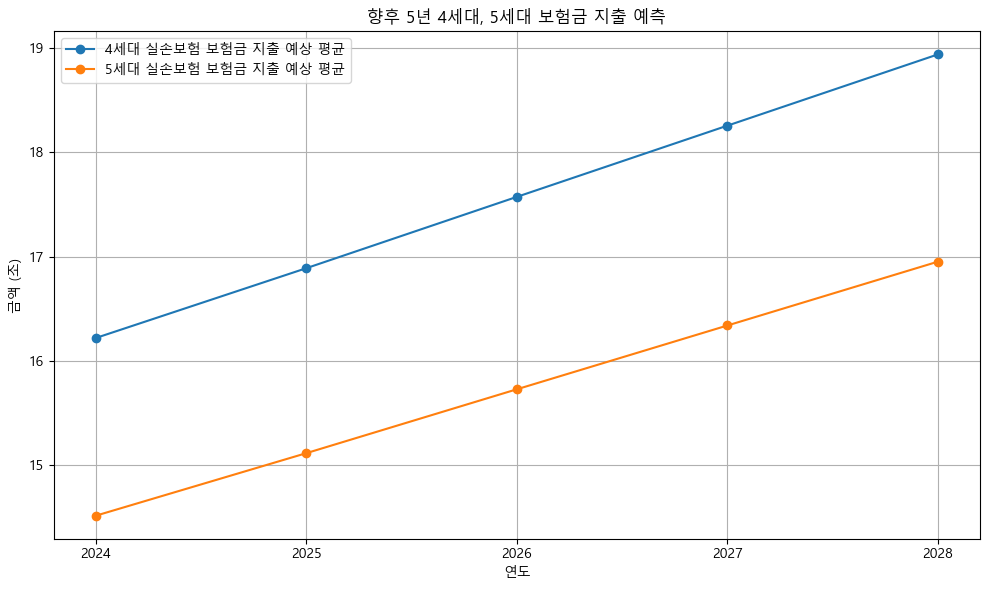

In [ ]:
import matplotlib.pyplot as plt

years = range(2024, 2029)

plt.figure(figsize=(10, 6))

ax1 = plt.gca()
ax1.plot(years, c_values, label='4세대 실손보험 보험금 지출 예상 평균', marker='o')
ax1.plot(years, f_values, label='5세대 실손보험 보험금 지출 예상 평균', marker='o')
ax1.set_ylabel('금액 (조)')

plt.xlabel('연도')
plt.title('향후 5년 4세대, 5세대 보험금 지출 예측')
plt.xticks(years)
plt.grid(True)
lines, labels = ax1.get_legend_handles_labels()
plt.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()

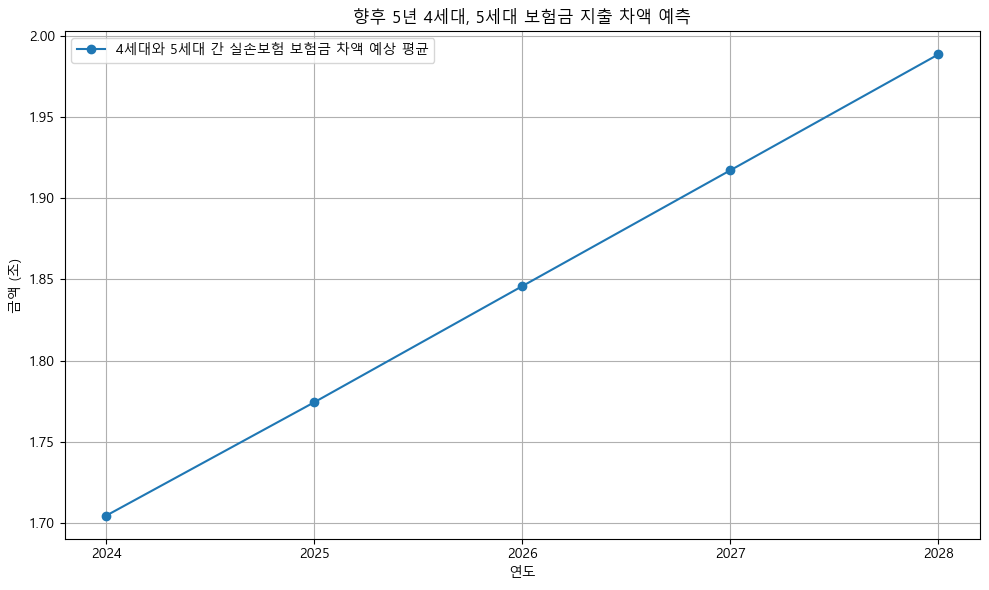

In [ ]:
years = range(2024, 2029)

plt.figure(figsize=(10, 6))

ax2 = plt.gca()
ax2.plot(years, difference_values, label='4세대와 5세대 간 실손보험 보험금 차액 예상 평균', marker='o')
ax2.set_ylabel('금액 (조)')
ax2.ticklabel_format(style='plain', axis='y')

plt.xlabel('연도')
plt.title('향후 5년 4세대, 5세대 보험금 지출 차액 예측')
plt.xticks(years)
plt.grid(True)
lines, labels = ax2.get_legend_handles_labels()
plt.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()